In [3]:
import sqlite3

conn = sqlite3.connect('Oscars.sqlite3')
c = conn.cursor()

#3)მოიგო თუ არა ოსკარი ფილმით მსახიობმა/რეჟისორმა კონკრეტულ კატეგორიაში
def WinOrNot(Film,Name,Category):
    result=c.execute('SELECT * FROM OscarsAward WHERE Film=? AND Name=?  AND Category=? ',
                     (Film,Name,Category)).fetchone()[3]
    if result == "FALSE":
        result='ვერ მიიღო ოსკარი'
    else:
        result='მიიღო ოსკარი'
    return f'მსახიობმა {Name}-მ,ფილმით {Film}, კატეგორიაში {Category} ,{result}'

#3)
Obj1=WinOrNot('Wicked',"Cynthia Erivo",'ACTRESS')
print(Obj1)

მსახიობმა Cynthia Erivo-მ,ფილმით Wicked, კატეგორიაში ACTRESS ,ვერ მიიღო ოსკარი


In [4]:
import sqlite3

conn = sqlite3.connect('Oscars.sqlite3')
c = conn.cursor()

#4)მომხმარებელი ამატებს ახალ ინფორმაციას
def NewInformation():
    print('----ინფორმაციის დამატება----')
    #NewName-ახალი სახელი ,NewCategory-ახალი კატეგორია ,NewFilm-ახალი ფილმი,
    #NewCeremonyYear-ახალი ცერემონიის წელი, WorL-მოიპოვა თუ არა ოსკარი
    NewName = str(input('გთხოვთ, შემოიტანოთ თქვენთვის სასურველი მსახიობის სახელი და გვარი: '))
    NewCategory = str(input('დაამატეთ თქვენთვის სასურველი კატეგორია ახალი მსახიობისთვის: '))
    NewFilm = str(input('დაამატეთ თქვენთვის სასურველი ფილმი ახალი მსახიობისთვის: '))
    NewCeremonyYear = input('როდის ტარდება ეს დაჯილდოება?: ')
    WorL = input('მოიგო თუ არა ოსკარი ამ მსახიობმა? (TRUE/FALSE): ')

    c.execute('INSERT INTO OscarsAward (Name, Category, Film, Year_Ceremony, Win_Oscar) VALUES (?, ?, ?, ?, ?)',
              (NewName, NewCategory, NewFilm, NewCeremonyYear, WorL))

    conn.commit()
    print("ინფორმაცია წარმატებით დაემატა ბაზაში.")

#4)
NewInformation()

----ინფორმაციის დამატება----


გთხოვთ, შემოიტანოთ თქვენთვის სასურველი მსახიობის სახელი და გვარი:  Ariana Grande
დაამატეთ თქვენთვის სასურველი კატეგორია ახალი მსახიობისთვის:  ACTRESS
დაამატეთ თქვენთვის სასურველი ფილმი ახალი მსახიობისთვის:  Wicked
როდის ტარდება ეს დაჯილდოება?:  2025
მოიგო თუ არა ოსკარი ამ მსახიობმა? (TRUE/FALSE):  TRUE


ინფორმაცია წარმატებით დაემატა ბაზაში.


In [5]:
import sqlite3

conn = sqlite3.connect('Oscars.sqlite3')
c = conn.cursor()
#5)ვანახლებთ არსებულ მონაცემებს
#ვცვლით ნებისმიერრი მსახიობის ინფორმაციას რომელმაც კონკრეტულ ნომინაციაში ,კონკრეტულ წელს,
#კონკრეტული ფილმით ვერ მიიღო/მიიღო ოსკარი
def UpdateInformation():
    print('----ინფორმაციის განახლება----')
    UPName=str(input('გთხოვთ, შემოიტანოთ იმ მსახიობის სახელი და გვარი, რომლის შედეგის შეცვკაც გინდათ: '))
    UpCategory=str(input('გთხოვთ შემოიტანოთ იმ კატეგორიის სახელი , რომლის შედეგიც შეცვლაც გინდათ ამ მსახიობისთვის:'))
    UpFilm = input('გთხოვთ, შეიყვანოთ ის ფილმი, რომელშიც მონაწილეობდა ეს მსახიობი: ')
    UpYear = input('გთხოვთ, შეიყვანოთ ცერემონიის წელი: ')
    NewResult = input('შეიყვანეთ ახალი სტატუსი (TRUE ან FALSE), მიიღო თუ არა ოსკარი: ')

    c.execute('''
           UPDATE OscarsAward
           SET Win_Oscar=?
           WHERE Film=? AND Name=? AND Category=? AND Year_Ceremony=?
       ''', (NewResult, UpFilm, UPName, UpCategory, UpYear))

    conn.commit()
    print("მონაცემები წარმატებით განახლდა.")

#5)
UpdateInformation()

----ინფორმაციის განახლება----


გთხოვთ, შემოიტანოთ იმ მსახიობის სახელი და გვარი, რომლის შედეგის შეცვკაც გინდათ:  Cynthia Erivo
გთხოვთ შემოიტანოთ იმ კატეგორიის სახელი , რომლის შედეგიც შეცვლაც გინდათ ამ მსახიობისთვის: ACTRESS
გთხოვთ, შეიყვანოთ ის ფილმი, რომელშიც მონაწილეობდა ეს მსახიობი:  Wicked
გთხოვთ, შეიყვანოთ ცერემონიის წელი:  2025
შეიყვანეთ ახალი სტატუსი (TRUE ან FALSE), მიიღო თუ არა ოსკარი:  TRUE


მონაცემები წარმატებით განახლდა.


In [6]:
import sqlite3

conn = sqlite3.connect('Oscars.sqlite3')
c = conn.cursor()

#6)ვშლით ინფორმაციას
#მომხმარებელი შლის მთლიან რიგს ნებისმიერი მსახიობისა(სახელი,ფილმი,წელი,კატეგორია,შედეგი)
print('----ინფორმაციის წაშლა----')
def DelInformation():
    DelName=str(input('გთხოვთ შემოიტანოთ სახელი იმ მსახიობისა რომლის წაშლაც გსურთ:'))
    DelCategory =str(input('გთხოვთ შემოიტანოთ კატეგორია იმ მსახიობისა რომლის წაშლაც გსურთ:'))
    DelFilm=input('გთხოვთ შემოიტანოთ სახელი იმ ფილმისა , რომლის წაშლაც გსურთ:')
    DelYear=input('გთხოვთ შემოიტანოთ ცერემონიის წელი იმ იმ დაჯილდოებისა , რომლის წაშლაც გსურთ:')
    DelResult=input('გთხოვთ შემოიტანოთ შედეგი იმ მსახიობისთვის , რომლის წაშლაც გსურთ:')


    c.execute('''
                 DELETE FROM OscarsAward
                WHERE Win_Oscar=? AND Film=? AND Name=? AND Category=? AND Year_Ceremony=?
              ''', (DelResult, DelFilm, DelName, DelCategory, DelYear))

    conn.commit()
    print("მონაცემები წარმატებით წაიშალა.")

#6)
DelInformation()


----ინფორმაციის წაშლა----


გთხოვთ შემოიტანოთ სახელი იმ მსახიობისა რომლის წაშლაც გსურთ: Cynthia Erivo
გთხოვთ შემოიტანოთ კატეგორია იმ მსახიობისა რომლის წაშლაც გსურთ: ACTRESS
გთხოვთ შემოიტანოთ სახელი იმ ფილმისა , რომლის წაშლაც გსურთ: Wicked
გთხოვთ შემოიტანოთ ცერემონიის წელი იმ იმ დაჯილდოებისა , რომლის წაშლაც გსურთ: 2025
გთხოვთ შემოიტანოთ შედეგი იმ მსახიობისთვის , რომლის წაშლაც გსურთ: FALSE


მონაცემები წარმატებით წაიშალა.


284 1111 191 745


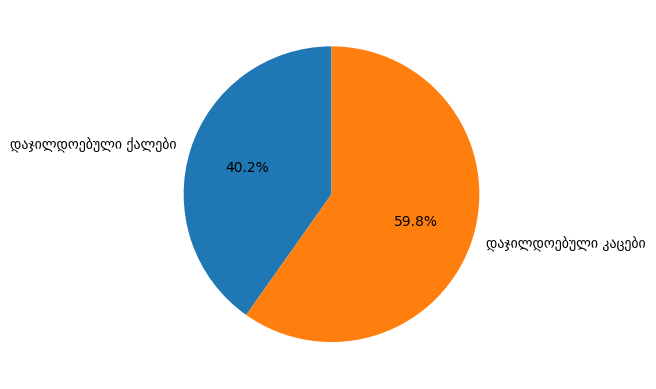

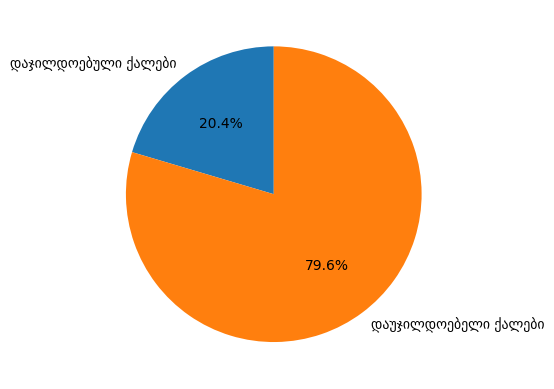

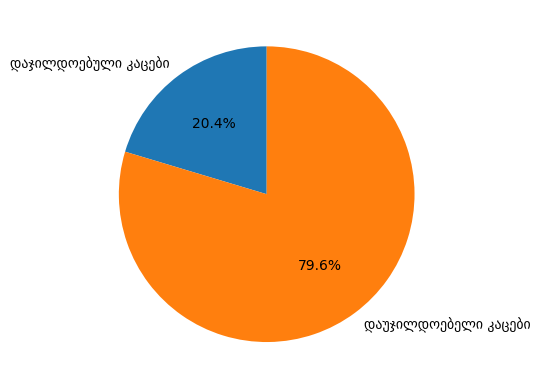

In [7]:
import sqlite3

conn = sqlite3.connect('Oscars.sqlite3')
c = conn.cursor()

#7)
import matplotlib.pyplot as plt

def CountWorLByGender(Gender,Win_Oscar):
    return c.execute('SELECT count(*) FROM OscarsAward WHERE Gender=? AND Win_Oscar=?',
                     (Gender,Win_Oscar)).fetchone()[0]
CWinnerFemale=CountWorLByGender('Female','TRUE')
CWinnerMale=CountWorLByGender('Male','TRUE')
CNotWinnerFemale=CountWorLByGender('Female','FALSE')
CNotWinnerMale=CountWorLByGender('Male','FALSE')
print(CWinnerMale,CNotWinnerMale,CWinnerFemale,CNotWinnerFemale)

7.1
labels='დაჯილდოებული ქალები','დაჯილდოებული კაცები'
sizes=[CWinnerFemale,CWinnerMale]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels , autopct='%1.1f%%',startangle=90)
plt.show()

# 7.2
labels='დაჯილდოებული ქალები','დაუჯილდოებელი ქალები'
sizes=[CWinnerFemale,CNotWinnerFemale]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels , autopct='%1.1f%%',startangle=90)
plt.show()

# 7.3
labels='დაჯილდოებული კაცები','დაუჯილდოებელი კაცები'
sizes=[CWinnerMale,CNotWinnerMale]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels , autopct='%1.1f%%',startangle=90)
plt.show()

conn.close()